In [150]:
from groupy import config, Group, Bot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [115]:
# get group; if don't know group_id can filter by name (but name liable to change)
config.API_KEY = 'Obswbyyf83EViCprfCOJHER8XbhMCd0Up99c3FBj'
# rip = Group.list().filter(group_id='13678029')[0] # rip city
rip = Group.list().filter(group_id='24338846')[0] # stag city

In [116]:
# make a dict to go from user_ids to current name
rip_names = list(map(str, rip.members()))
rip_ids = list(map(lambda x: str(x.user_id), rip.members()))
rip_dict = dict(zip(rip_ids, rip_names))
# find and change accordingly
rip_dict['system'] = 'system'
# rip_dict['354536'] = 'ripbot'
rip_dict['356381'] = 'fitbot'

In [117]:
rip.message_count

1384

In [118]:
# get all messages (11,000+)
messages = rip.messages()
while messages.iolder():
    pass

In [119]:
# get info about messages
m_times = [m.created_at for m in messages]
m_users = [m.user_id for m in messages]
m_likes = [len(m.likes()) for m in messages]
m_text = [str(m.text).strip() for m in messages]

In [120]:
# put into dataframe
df = pd.DataFrame({'user_id':m_users}, index=m_times)
df['name'] = df['user_id'].map(rip_dict)
df['likes'] = m_likes
df['text'] = m_text
df['chars'] = df['text'].map(lambda x: len(x))

In [121]:
df.head()

,user_id,name,likes,text,chars
2016-11-15 11:03:45,22942080,AT,0,Thanks for setting this up,26
2016-11-15 11:03:32,22942080,AT,1,No worries,10
2016-11-15 11:03:20,9197895,Kyle Barton,0,Alright sorry @AT I'm gonna keep the time. I'l...,145
2016-11-15 10:50:17,15629412,Ben Whitehead,1,I can do thurs at 6 as well,27
2016-11-15 10:50:10,9197895,Kyle Barton,1,I'd like to rest Wednesday. Fall league + lift...,78


In [122]:
# calc some stats
stats = pd.DataFrame({'messages':df['name'].value_counts()})
stats.index.rename('name', inplace=True)
sums = df.groupby(['name']).sum()

stats = stats.merge(sums, left_index=True, right_index=True)
stats['like_per_m'] = stats['likes'] / stats['messages']
stats['like_per_char'] = stats['likes'] / stats['chars']

In [123]:
num_m = stats['messages'].sum()
num_l = stats['likes'].sum()

In [124]:
stats['perc_m'] = stats['messages'] / num_m * 100
stats['perc_l'] = stats['likes'] / num_l * 100

In [125]:
stats.sort_values('messages', ascending=False)

,messages,likes,chars,like_per_m,like_per_char,perc_m,perc_l
name,,,,,,,
AT,290,121,10185,0.417241,0.011880,20.953757,17.090395
Tyler Honsinger,209,84,5891,0.401914,0.014259,15.101156,11.864407
Kyle Barton,180,99,8939,0.550000,0.011075,13.005780,13.983051
fitbot,148,77,10790,0.520270,0.007136,10.693642,10.875706
August Schwartz,141,67,4423,0.475177,0.015148,10.187861,9.463277
Ben Whitehead,118,52,4289,0.440678,0.012124,8.526012,7.344633
Austin Kelly,69,35,2603,0.507246,0.013446,4.985549,4.943503
Chris Blaydon,59,50,2206,0.847458,0.022665,4.263006,7.062147
Ethan Bruno,56,34,3194,0.607143,0.010645,4.046243,4.802260


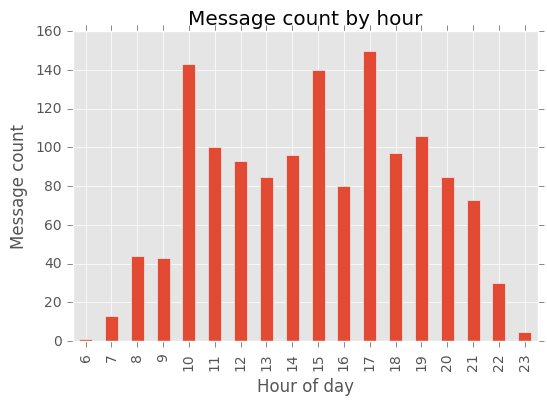

In [126]:
# do some plotting
ax = df.groupby([df.index.hour])['user_id'].count().plot(kind='bar')
ax.set_ylabel('Message count')
ax.set_xlabel('Hour of day')
ax.set_title('Message count by hour')

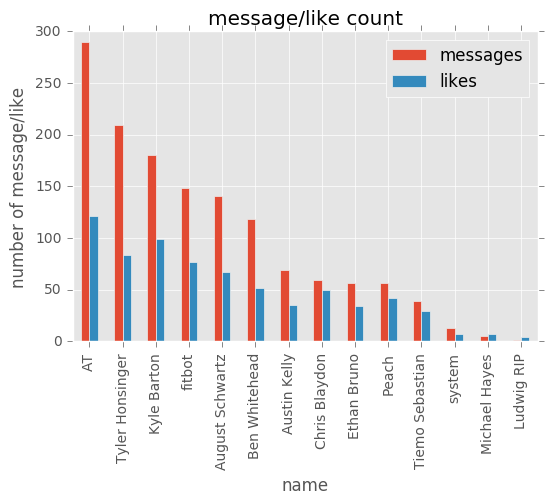

In [127]:
ax2 = stats[['messages', 'likes']].sort_values('messages', ascending=False).head(20).plot(kind='bar', stacked=False)
ax2.set_ylabel('number of message/like')
ax2.set_title('message/like count')

In [146]:
import io
corpus = io.StringIO()
for m in df['text']:
    try:
        corpus.write(m + '\n\n')
    except UnicodeEncodeError:
        pass

In [147]:
import markovify

text_model = markovify.NewlineText(corpus.getvalue())

In [148]:
for i in range(5):
    print(text_model.make_sentence())
    print()

Oh well I got an extra ticket to the Church of Sanatan count?

If pier park with ultrastars?

Clear throughout the day. 13 °F, 0 % chance of rain, 0.99 mph wind for the next hour.

Anybody wanna throw today? Pref before noon

@AT And I wasn't sure if it throw a little too



In [149]:
for i in range(3):
    print(text_model.make_short_sentence(140))
    print()

Found out how to work if you still wanna throw today?

So is anyone able to get it back.

Actually, I need to get a beer anyways



In [174]:
group_ids = list(map(int, [bot.group_id for bot in Bot.list()]))

# make dict of all messages for each group
markovs = {}
for group_id in group_ids:
    messages = Group.list().filter(group_id=str(group_id))[0].messages()
    while messages.iolder():
        pass
    
    corpus = io.StringIO()
    for m in messages:
        corpus.write(str(m.text).strip() + '\n\n')
    
    text_model = markovify.NewlineText(corpus.getvalue())
    markovs[group_id] = text_model

In [204]:
markovs[24338846].make_short_sentence(140)

'538 would be better'

In [199]:
markovs[13678029].make_short_sentence(140)

'Pat just wanted to let those reedies know'